In [1]:
! pip install finance-datareader

In [2]:
! pip install pandas-datareader

In [3]:
import datetime
import FinanceDataReader as fdr  
import matplotlib.pyplot as plt

In [4]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 6, 30)

# 1/1부터 6/30까지의 주식데이터 불러오기

In [5]:
samsung = fdr.DataReader('005930',start,end)
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2021-06-24,80400,81400,80100,81200,18771080,0.013733
2021-06-25,81500,81900,81200,81600,13481405,0.004926
2021-06-28,81700,82000,81600,81900,11578529,0.003676


# 변동폭에 따라서 등락구분짓기

In [6]:
samsung['등락구분']=(samsung['Change']>0)
samsung

,Open,High,Low,Close,Volume,Change,등락구분
Date,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,True
2021-01-05,81600,83900,81600,83900,35335669,0.010843,True
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,False
2021-01-07,82800,84200,82700,82900,32644642,0.008516,True
2021-01-08,83300,90000,83000,88800,59013307,0.071170,True
...,...,...,...,...,...,...,...
2021-06-24,80400,81400,80100,81200,18771080,0.013733,True
2021-06-25,81500,81900,81200,81600,13481405,0.004926,True
2021-06-28,81700,82000,81600,81900,11578529,0.003676,True


In [7]:
samsung_df = samsung[['Close','Change','등락구분']]
samsung_df

,Close,Change,등락구분
Date,,,
2021-01-04,83000,0.024691,True
2021-01-05,83900,0.010843,True
2021-01-06,82200,-0.020262,False
2021-01-07,82900,0.008516,True
2021-01-08,88800,0.071170,True
...,...,...,...
2021-06-24,81200,0.013733,True
2021-06-25,81600,0.004926,True
2021-06-28,81900,0.003676,True


# 시계열 주가 그래프

<function matplotlib.pyplot.show(close=None, block=None)>

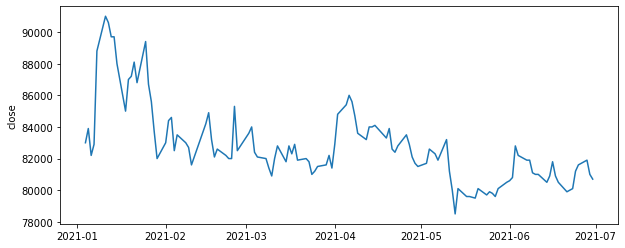

In [8]:
plt.figure(figsize=(10,4))

plt.plot(samsung_df['Close'])
plt.xlabel('')
plt.ylabel('close')
plt.show

# 주가 변동 그래프

<function matplotlib.pyplot.show(close=None, block=None)>

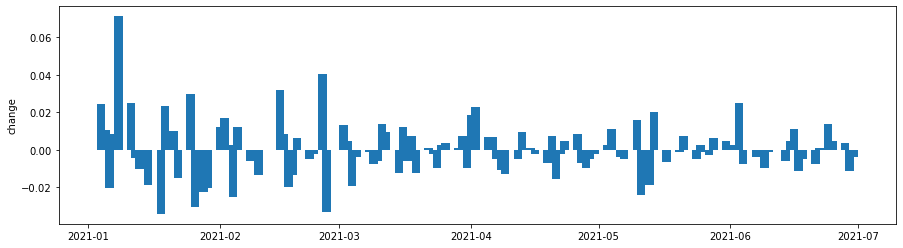

In [9]:
plt.figure(figsize=(15,4))

plt.bar(samsung_df.index,samsung_df['Change'], width=2)
plt.xlabel('')
plt.ylabel('change')
plt.show

In [10]:
samsung_df.to_csv('주가 크롤링.csv')